In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import time

# Import the cleaning and preprocessing functions
import data_cleaning as dc
import data_preprocessing as dp

# Load and clean the data
file_path = 'data/AmesData.csv'
ames_df_cleaned = dc.load_and_clean_data(file_path)


Columns with missing values and their counts before preprocessing:
Alley           2593
MasVnrType      1629
MasVnrArea        21
BsmtQual          64
BsmtCond          64
BsmtExposure      67
BsmtFinType1      64
BsmtFinType2      65
Electrical         1
FireplaceQu     1277
PoolQC          2756
Fence           2227
MiscFeature     2671
dtype: int64

Columns with missing values after imputation and their counts:
Series([], dtype: int64)

The dataset contains 2769 rows and 80 columns before outlier removal.
Number of rows removed based on 'GrLivArea' > 4000: 5

The dataset contains 2764 rows and 80 columns after outlier removal.


# Baseline Simple Linear Regression Model

This is our first baseline Simple Linear Regression Model, which uses the cleaned but unprocessed dataset. 

Regression Model: SalePrice = 86.48925401659768 * TotalLivingArea + -36814.71686382592
Mean Absolute Error: $30744.679650168604
Training Time: 0.002717256546020508 seconds


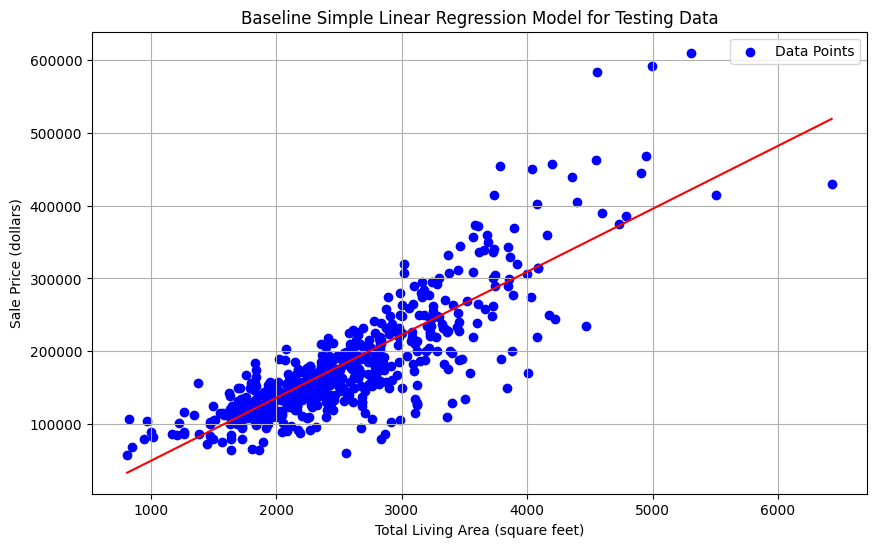

In [2]:
# Create a new independent variable for total living area
ames_df_cleaned['TotalLivingArea'] = ames_df_cleaned['GrLivArea'] + ames_df_cleaned['TotalBsmtSF']

# Baseline Linear Regression using cleaned but not preprocessed data
x = ames_df_cleaned[['TotalLivingArea']]
y = ames_df_cleaned['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

# Build the model and measure the training time
model = LinearRegression()
start_time = time.time()
model.fit(x_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Make predictions, evaluate accuracy of the model, and print the results
y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Regression Model: SalePrice = {model.coef_[0]} * TotalLivingArea + {model.intercept_}")
print(f"Mean Absolute Error: ${mae}")
print(f"Training Time: {training_time} seconds")

# Create scatterplots for the testing data
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='blue', label='Data Points')

# Compute the line values
x_values = np.linspace(x_test.min(), x_test.max(), 100)
y_values = model.coef_[0] * x_values + model.intercept_

# Plot the line
plt.plot(x_values, y_values, color='red')

# Add labels and show the plot
plt.xlabel('Total Living Area (square feet)')
plt.ylabel('Sale Price (dollars)')
plt.title('Baseline Simple Linear Regression Model for Testing Data')
plt.legend()
plt.grid(True)
plt.show()


Raw Data Set

Regression Model: SalePrice = 82.2362686925065 * TotalLivingArea + -26894.90013254044
Mean Absolute Error: $32682.908468091653
Training Time: 0.00177001953125 seconds


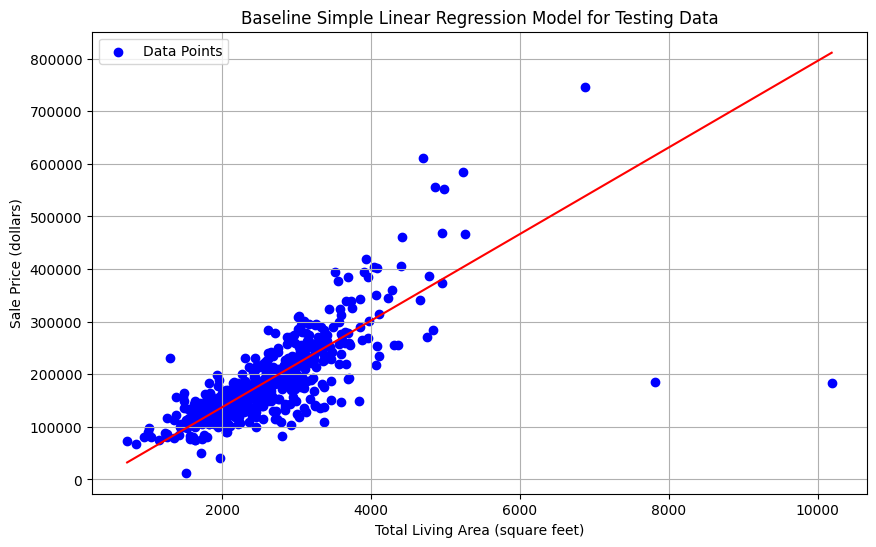

In [3]:
# Load the Ames dataset
file_path = 'data/AmesData.csv'
ames_df = pd.read_csv(file_path)

# Create a new independent variable for total living area
ames_df['TotalLivingArea'] = ames_df['GrLivArea'] + ames_df['TotalBsmtSF'].fillna(0)

# Split the dataset into a testing dataset and a training dataset
x = ames_df[['TotalLivingArea']]
y = ames_df['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

# Build the model and measure the training time
model = LinearRegression()
start_time = time.time()
model.fit(x_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Make predictions, evaluate accuracy of the model, and print the results
y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Regression Model: SalePrice = {model.coef_[0]} * TotalLivingArea + {model.intercept_}")
print(f"Mean Absolute Error: ${mae}")
print(f"Training Time: {training_time} seconds")

# Create scatterplots for the testing data
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='blue', label='Data Points')

# Compute the line values
x_values = np.linspace(x_test.min(), x_test.max(), 100)
y_values = model.coef_[0] * x_values + model.intercept_

# Plot the line
plt.plot(x_values, y_values, color='red')

# Add labels and show the plot
plt.xlabel('Total Living Area (square feet)')
plt.ylabel('Sale Price (dollars)')
plt.title('Baseline Simple Linear Regression Model for Testing Data')
plt.legend()
plt.grid(True)
plt.show()

Cleaned and Preprocessed


Columns with missing values and their counts before preprocessing:
Alley           2593
MasVnrType      1629
MasVnrArea        21
BsmtQual          64
BsmtCond          64
BsmtExposure      67
BsmtFinType1      64
BsmtFinType2      65
Electrical         1
FireplaceQu     1277
PoolQC          2756
Fence           2227
MiscFeature     2671
dtype: int64

Columns with missing values after imputation and their counts:
Series([], dtype: int64)

The dataset contains 2769 rows and 80 columns before outlier removal.
Number of rows removed based on 'GrLivArea' > 4000: 5

The dataset contains 2764 rows and 80 columns after outlier removal.
Categorical variables encoded.
Numerical features standardized.
'SalePrice' standardized.
Baseline Linear Regression Model Performance with TotalLivingArea:
Mean Absolute Error (MAE): $31735.20
Mean Squared Error (MSE): $1912756864.35
Training Time: 0.00 seconds


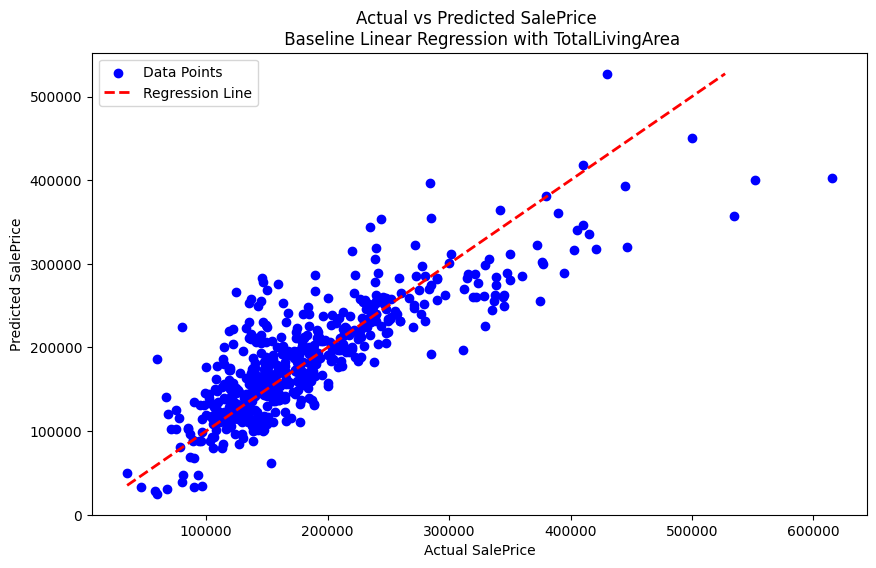

Regression Coefficients (Scaled): [0.50222409]
Intercept (Scaled): 0.007805554496110177
Regression Coefficients (Original Scale): TotalLivingArea: 23495.303012732336
Intercept (Original Scale): 184714.98335745296


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import time

# Import the cleaning and preprocessing functions
import data_cleaning as dc
import data_preprocessing as dp

# Load and clean the data
file_path = 'data/AmesData.csv'
ames_df_cleaned = dc.load_and_clean_data(file_path)

# Preprocess the cleaned data
ames_df_preprocessed, saleprice_scaler = dp.preprocess_data(ames_df_cleaned)

# Create a new independent variable for total living area after preprocessing
ames_df_preprocessed['TotalLivingArea'] = ames_df_preprocessed['GrLivArea'] + ames_df_preprocessed['TotalBsmtSF']

# Prepare features and target variable
X = ames_df_preprocessed[['TotalLivingArea']]
y = ames_df_preprocessed['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Linear Regression model
lin_reg = LinearRegression()

# Start the timer for training
training_start_time = time.time()

# Train the model
lin_reg.fit(X_train, y_train)

# End the timer for training
training_end_time = time.time()
training_time = training_end_time - training_start_time

# Make predictions
y_pred = lin_reg.predict(X_test)

# Un-transform the predictions back to the original scale
y_pred_original = saleprice_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_original = saleprice_scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Evaluate the model
mae = mean_absolute_error(y_test_original, y_pred_original)
mse = mean_squared_error(y_test_original, y_pred_original)

print("Baseline Linear Regression Model Performance with TotalLivingArea:")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Mean Squared Error (MSE): ${mse:.2f}")
print(f"Training Time: {training_time:.2f} seconds")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_original, color='blue', label='Data Points')
plt.plot([y_test_original.min(), y_pred_original.max()], [y_test_original.min(), y_pred_original.max()], 'r--', lw=2, label='Regression Line')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice \n Baseline Linear Regression with TotalLivingArea')
plt.legend()
plt.show()

# Print the regression coefficients and intercept for the scaled data
print(f"Regression Coefficients (Scaled): {lin_reg.coef_}")
print(f"Intercept (Scaled): {lin_reg.intercept_}")

# Adjust the coefficients and intercept to the original scale
total_living_area_mean = ames_df_preprocessed['TotalLivingArea'].mean()
total_living_area_std = ames_df_preprocessed['TotalLivingArea'].std()

saleprice_mean = saleprice_scaler.mean_[0]
saleprice_std = saleprice_scaler.scale_[0]

# Original scale coefficients
coef_total_living_area_original = lin_reg.coef_[0] * saleprice_std / total_living_area_std

# Original scale intercept
intercept_original = saleprice_mean - (coef_total_living_area_original * total_living_area_mean)

print(f"Regression Coefficients (Original Scale): TotalLivingArea: {coef_total_living_area_original}")
print(f"Intercept (Original Scale): {intercept_original}")
